# 4.9 IC Basic Charts2

## 1. Import data and libraries
## 2. Creating Bar Charts
## 3. Creating Histogram & Scatterplots
## 4. Creating Line Charts
## 5. Sampling

### 1. Import Data and Libraries

In [1]:
# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create Path

In [4]:
path = r'/Users/bethanybreed/Documents/A Career Foundry/07-2022 Instacart Basket Analysis'

In [5]:
# Import Data as ords_prods_merge

In [6]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'prepared data', 'orders_products_merged48.pkl'))

### 2. Creating Bar Charts

In [7]:
# Create a bar chart

<AxesSubplot:>

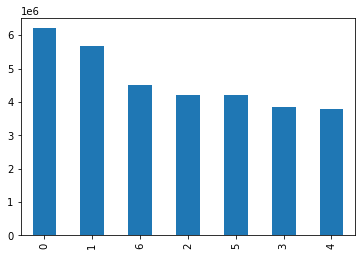

In [8]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

In [9]:
#Changing index order

<AxesSubplot:>

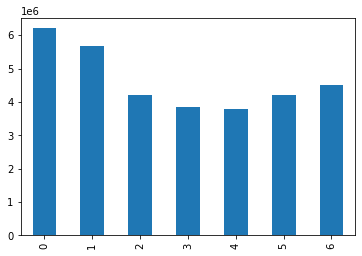

In [10]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [11]:
# Change colors

<AxesSubplot:>

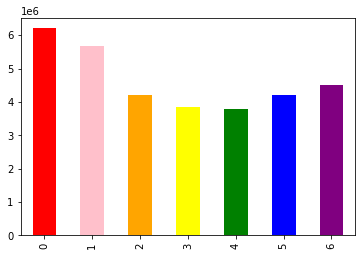

In [12]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red','pink','orange','yellow','green','blue','purple'])

In [13]:
# save as bar object

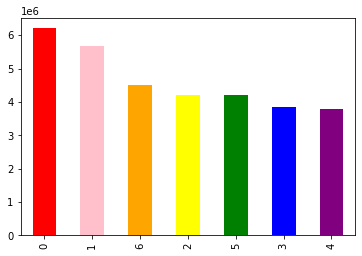

In [14]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['red', 'pink', 'orange', 'yellow', 'green', 'blue', 'purple'])

In [15]:
#export bar to visualizations folder

In [16]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 3. Creating Histogram & Scatterplot Charts

In [17]:
#Create a Histogram of Prices Column

<AxesSubplot:ylabel='Frequency'>

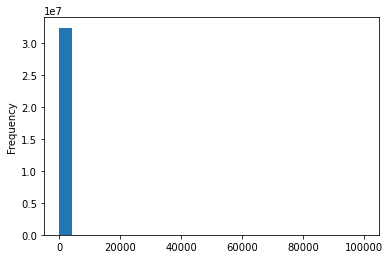

In [18]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [19]:
#You can see that there is an issue, 
#checking max you can see there is an item for 99,999 but mean is about 12 and median is 7
#This means there is 1 odd value really high and we can't see the bar, but the rest are lumped in 1 bar together

<AxesSubplot:xlabel='prices', ylabel='prices'>

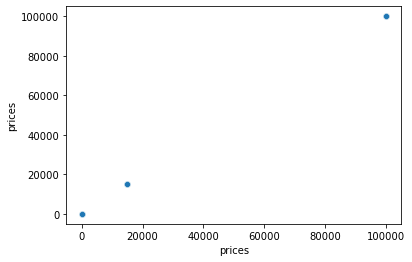

In [20]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [21]:
# with this you can see the outlier up in the top right corner
# you also see one close to 20,000 which also seems to be an outlier

In [22]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,order_frequency,order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Busiest days,Most Orders,40,Regular customer,108.648299,High Spender,5.0,Frequent Customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Regular days,Most Orders,40,Regular customer,108.648299,High Spender,5.0,Frequent Customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Busiest days,Average Orders,4,New customer,1154.792308,High Spender,11.5,Regular Customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,Busiest day,Busiest days,Average Orders,4,New customer,1154.792308,High Spender,11.5,Regular Customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Regular days,Average Orders,16,Regular customer,114.426619,High Spender,20.0,Regular Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,both,Busiest day,Busiest days,Average Orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent Customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,both,Busiest day,Busiest days,Most Orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent Customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,both,Regularly busy,Slowest days,Most Orders,15,Regular customer,451.153540,High Spender,5.0,Frequent Customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,both,Regularly busy,Slowest days,Average Orders,12,Regular customer,1178.381871,High Spender,7.0,Frequent Customer


In [23]:
#mark the outlier values as NaN

In [24]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [25]:
#Check prices to see new max value

In [26]:
ords_prods_merge['prices'].max()

25.0

In [27]:
# new max value is 25 which makes more sense for the data

In [28]:
#New Histogram

<AxesSubplot:ylabel='Frequency'>

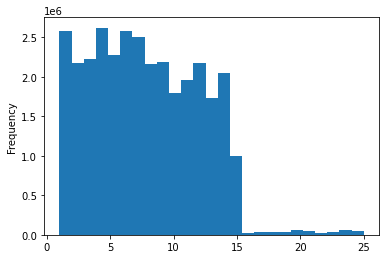

In [29]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [30]:
#Create object and export graph

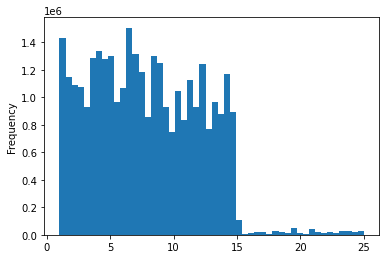

In [31]:
hist = ords_prods_merge['prices'].plot.hist(bins = 50)

In [32]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

### 4. Creating Line Charts

In [33]:
#Knowing how large the data set is, we are choosing to get a "sampling" of data first before doing this

### 5. Sampling

In [34]:
np.random.rand(10)

array([0.0190014 , 0.51092311, 0.85809875, 0.56738872, 0.27207565,
       0.44472137, 0.25854974, 0.30701963, 0.19699688, 0.80077231])

In [35]:
#Actual sampling for data

In [36]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [37]:
#store 70% of data in dataframe big

In [38]:
big = ords_prods_merge[dev]

In [39]:
#store 30% of data in dataframe small

In [40]:
small = ords_prods_merge[~dev]

In [41]:
#Check amount of rows for original data vs combined big and small

In [42]:
len(ords_prods_merge)

32404859

In [43]:
len(big) + len(small)

32404859

In [44]:
#Create a smaller data set with only what is needed (prices and day order of week)

In [45]:
df_2 = small[['orders_day_of_week','prices']]

In [46]:
#Create Line Chart

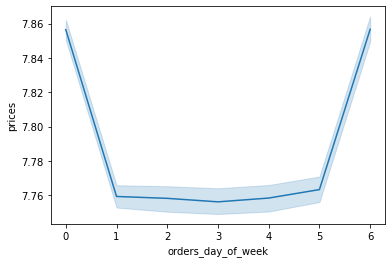

In [47]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')